In [1]:
#예제 3.1 텐서 생성
import torch

print(torch.tensor([1,2,3]))
print(torch.Tensor([[1,2,3],[4,5,6]]))
print(torch.LongTensor([1,2,3]))
print(torch.FloatTensor([1,2,3]))

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [2]:
#예제 3.2 텐서 속성

tensor = torch.rand(1,2)
print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

tensor([[0.2471, 0.9911]])
torch.Size([1, 2])
torch.float32
cpu


In [3]:
#예제 3.3 텐서 차원 변환

tensor = torch.rand(1,2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2,1)
print(tensor)
print(tensor.shape)

tensor([[0.4681, 0.5992]])
torch.Size([1, 2])
tensor([[0.4681],
        [0.5992]])
torch.Size([2, 1])


In [4]:
#예제 3.4 텐서 자료형 설정

tensor = torch.rand((3,3), dtype=torch.float)
print(tensor)

tensor([[0.0821, 0.7843, 0.4730],
        [0.7750, 0.1718, 0.3111],
        [0.6356, 0.1970, 0.5729]])


In [6]:
#예제 3.5 텐서 GPU 장치 설정

device = "cuda" if torch.torch.cuda.is_available() else "cpu"
cpu = torch.FloatTensor([1,2,3])
mps = tensor.to(device)
tensor = torch.rand((1,1), device=device)
print(device)
print(cpu)
print(mps)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([[0.4041]], device='cuda:0')
tensor([[0.6215]], device='cuda:0')


In [7]:
#예제 3.6 텐서 장치 변환

cpu = torch.FloatTensor([1,2,3])
gpu = cpu.to(device)
gpu2cpu = gpu.cpu()
cpu2gpu = cpu.to(device)
print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


In [8]:
#예제 3.7 넘파이 배열의 텐서 변환

import numpy as np

ndarray = np.array([1,2,3], dtype=np.uint8)
print(torch.tensor(ndarray))
print(torch.Tensor(ndarray))
print(torch.from_numpy(ndarray))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


In [9]:
#예제 3.8 텐서의 넘파이 배열 변환

tensor = torch.FloatTensor([1,2,3])
tensor = tensor.to(device)
ndarray = tensor.detach().cpu().numpy()
print(ndarray)
print(type(ndarray))

[1. 2. 3.]
<class 'numpy.ndarray'>


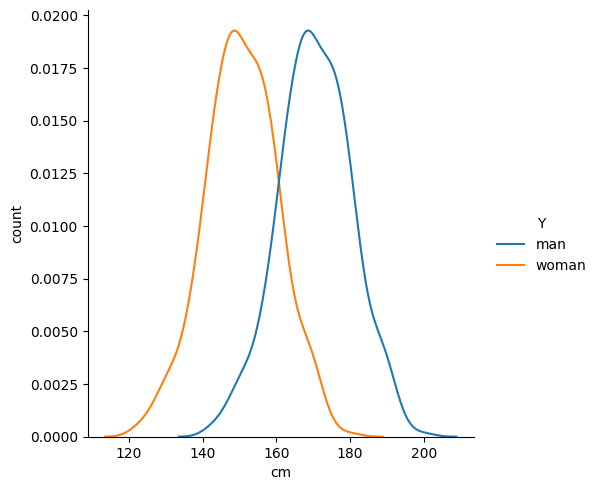

In [11]:
#예제 3.9 성별에 따른 키 차이 검정

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1)

X = np.concatenate([man_height, woman_height])
Y = ["man"]*len(man_height)+["woman"]*len(woman_height)

df = pd.DataFrame(list(zip(X,Y)), columns=["X","Y"])
fig = sns.displot(data = df, x = "X", hue = "Y", kind = "kde")
fig.set_axis_labels("cm", "count")
plt.show()

In [12]:
#예제 3.10 비쌍체 t-검정
statistic, pvalue = stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic:", statistic)
print("pvalue:",pvalue)
print("*:",pvalue < 0.05)
print("**:", pvalue < 0.001)

statistic: 31.96162891312776
pvalue: 6.2285854381989205e-155
*: True
**: True


In [15]:
#예제 3.17 단순 선형 회귀(넘파이)

import numpy as np

x = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
              [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
                [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]])
y = np.array([[0.94],[1.98],[2.88],[3.92],[3.96],[4.55],[5.64],[6.3],[7.44],[9.1],
              [8.46],[9.5],[10.67],[11.16],[14],[11.83],[14.4],[14.25],[16.2],[16.32],
              [17.46],[19.8],[18],[21.34],[22],[22.5],[24.57],[26.04],[21.6],[28.8]])

weight = 0.0
bias = 0.0
learning_rate = 0.005

for epoch in range(10000):
    y_hat = weight * x + bias
    cost = ((y - y_hat)**2).mean()

    weight = weight - learning_rate*((y_hat - y)*x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 2000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 3000, Weight : 0.878, Bias : -0.422, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.432, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.435, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


In [14]:
#예제 3.24 단순 선형 회귀(파이토치)
import torch
from torch import optim

x = torch.FloatTensor([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
              [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
                [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]])
y = torch.FloatTensor([[0.94],[1.98],[2.88],[3.92],[3.96],[4.55],[5.64],[6.3],[7.44],[9.1],
              [8.46],[9.5],[10.67],[11.16],[14],[11.83],[14.4],[14.25],[16.2],[16.32],
              [17.46],[19.8],[18],[21.34],[22],[22.5],[24.57],[26.04],[21.6],[28.8]])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1,requires_grad = True)
learning_rate = 0.001

optimizer = optim.SGD([weight,bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = x * weight + bias
    cost = torch.mean((hypothesis - y) ** 2)

    optimizer.zero_grad() #gradient를 0으로 초기화
    cost.backward() #비용 함수를 미분하여 gradient 계산
    optimizer.step() #가중치와 편향을 업데이트

    if(epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost.item():.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


In [17]:
#예제 3.28 신경망 패키지 적용

import torch
from torch import nn
from torch import optim

x = torch.FloatTensor([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
              [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
                [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]])
y = torch.FloatTensor([[0.94],[1.98],[2.88],[3.92],[3.96],[4.55],[5.64],[6.3],[7.44],[9.1],
              [8.46],[9.5],[10.67],[11.16],[14],[11.83],[14.4],[14.25],[16.2],[16.32],
              [17.46],[19.8],[18],[21.34],[22],[22.5],[24.57],[26.04],[21.6],[28.8]])

model = nn.Linear(1,1) #입출력 차원 크기 매개변수가 weight 변수를 대체. (1,1,bias=True)와 같이bias 대체
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)

    optimizer.zero_grad() #기울기 0으로 초기화(누적 방지)
    cost.backward() #역전파 수행
    optimizer.step() #최적화 함수에 결과 반영

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Codt : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8896]], requires_grad=True), Parameter containing:
tensor([-0.6539], requires_grad=True)], Codt : 1.384
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8856]], requires_grad=True), Parameter containing:
tensor([-0.5716], requires_grad=True)], Codt : 1.377
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8831]], requires_grad=True), Parameter containing:
tensor([-0.5203], requires_grad=True)], Codt : 1.374
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8815]], requires_grad=True), Parameter containing:
tensor([-0.4885], requires_grad=True)], Codt : 1.373
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8805]], requires_grad=True), Parameter containing:
tensor([-0.4686], requires_grad=True)], Codt : 1.372
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8799]], requires_grad=True), Parameter containing:
tensor([-0.4563], requires_grad=True)], Codt : 1.372
Epoch : 7000, Model : [Parameter contain

In [18]:
#예제 3.33 다중 선형 회귀
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

train_x = torch.FloatTensor([[1,2],[2,3],[3,4],[4,5],[5,6],[6,7]])
train_y = torch.FloatTensor([[0.1,1.5],[1,2.8],[1.9,4.1],[2.8,5.4],[3.7,6.7],[4.6,8]])

train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size = 2, shuffle = True, drop_last = True)

model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(20000):
    cost = 0.0

    for batch in train_dataloader:
        x, y = batch
        output = model(x)

        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Codt : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.6754, 0.0270],
        [0.6639, 0.4800]], requires_grad=True), Parameter containing:
tensor([0.0037, 0.3762], requires_grad=True)], Codt : 0.109
Epoch : 2000, Model : [Parameter containing:
tensor([[ 0.8759, -0.0765],
        [ 0.8223,  0.3983]], requires_grad=True), Parameter containing:
tensor([-0.3002,  0.1361], requires_grad=True)], Codt : 0.028
Epoch : 3000, Model : [Parameter containing:
tensor([[ 0.9780, -0.1293],
        [ 0.9029,  0.3566]], requires_grad=True), Parameter containing:
tensor([-0.4551,  0.0137], requires_grad=True)], Codt : 0.007
Epoch : 4000, Model : [Parameter containing:
tensor([[ 1.0301, -0.1561],
        [ 0.9440,  0.3354]], requires_grad=True), Parameter containing:
tensor([-0.5340, -0.0486], requires_grad=True)], Codt : 0.002
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.0565, -0.1698],
        [ 0.9649,  0.3246]], requires_grad=True), Parameter containing:
tensor([-0.5742, -0.0804], requir

In [25]:
#예제 3.43 비선형 회귀

import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:,0].values
        self.y = df.iloc[:,1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index]**2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x,y
    
    def __len__(self):
        return self.length
    
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)

    def forward(self, x):
        x = self.layer(x)
        return x
    
train_dataset = CustomDataset("/home/yeeun/NLPCV/datasets/non_linear.csv")
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

for epoch in range(10000):
    cost = 0.0
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

#모델 평가
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([[1**2,1],[5**2,5],[11**2,11]]).to(device)
    outputs = model(inputs)
    print(outputs)
    
#모델 저장
torch.save(model,"../models/model.pt")

torch.save(model.state_dict(),"../models/model_state_dict.pt")

Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.0989, -1.7005]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5573], device='cuda:0', requires_grad=True)], Cost : 0.081
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.0989, -1.7034]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5519], device='cuda:0', requires_grad=True)], Cost : 0.077
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.0990, -1.7034]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5470], device='cuda:0', requires_grad=True)], Cost : 0.079
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.0990, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5425], device='cuda:0', requires_grad=True)], Cost : 0.073
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.0990, -1.7035]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5384], device='cuda:0', requires_grad=True)]

In [26]:
#예제 3.44 데이터세트 분리

import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:,0].values
        self.y = df.iloc[:,1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index]**2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x,y
    
    def __len__(self):
        return self.length
    
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)

    def forward(self, x):
        x = self.layer(x)
        return x
    
dataset = CustomDataset("/home/yeeun/NLPCV/datasets/non_linear.csv")
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])
print(f"Training Data Size : {len(train_dataset)}")
print(f"Validation Data Size : {len(validation_dataset)}")
print(f"Test Data Size : {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

device = "cuda" if torch.torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

for epoch in range(10000):
    cost = 0.0
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Codt : {cost:.3f}")

#모델 평가
with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device)
        y = y.to(device)

        outputs = model(x)
        print(f"X : {x}")
        print(f"Y : {y}")
        print(f"Outputs : {outputs}")
        print("---------")

        
#모델 저장
torch.save(model,"../models/model.pt")

torch.save(model.state_dict(),"../models/model_state_dict.pt")

Training Data Size : 160
Validation Data Size : 20
Test Data Size : 20
Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.0995, -1.7027]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4837], device='cuda:0', requires_grad=True)], Codt : 0.071
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.0989, -1.7030]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4720], device='cuda:0', requires_grad=True)], Codt : 0.074
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.0995, -1.7028]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4671], device='cuda:0', requires_grad=True)], Codt : 0.070
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.1002, -1.7029]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4650], device='cuda:0', requires_grad=True)], Codt : 0.075
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.0989, -1.7029]], device='cuda:0', requires_grad=True), Param

In [28]:
#예제 3.47 모델 불러오기

import torch
from torch import nn

class CustumModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)

    def forward(self,x):
        x = self.layer(x)
        return x
    
device = "cuda" if torch.torch.cuda.is_available() else "cpu"
model = torch.load("../models/model.pt", map_location = device)
print(model)

with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([[1**2,1],[5**2,5],[11**2,11]]).to(device)
    outputs = model(inputs)
    print(outputs)

CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)
tensor([[  1.8613],
        [ 69.4630],
        [356.8983]], device='cuda:0')


In [29]:
#예제 3.51 체크포인트 저장

import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

#중략

checkpoint = 1
for epoch in range(10000):

    #중략
    
    cost = cost / len(train_dataloader)

    if (epoch+1)%1000 == 0:
        torch.save({
            "model" : "CustonModel",
            "epoch" : epoch,
            "model_state_dict" : model.state_dict(),
            "optimizer_state_dict" : optimizer.state_dict(),
            "cost" : cost,
            "description" : f"CustomModel 체크포인트-{checkpoint}",
        }, f"../models/checkpoint-{checkpoint}.pt",
        )
        checkpoint += 1

In [30]:
#예제 3.52 체크포인트 불러오기

import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

#중략

checkpoint = torch.load("../models/checkpoint-6.pt")
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
checkpoint_epoch = checkpoint["epoch"]
checkpoint_description = checkpoint["description"]
print(checkpoint_description)

for epoch in range(checkpoint_epoch+1, 10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
        if (epoch+1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")


CustomModel 체크포인트-6
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1005, -1.7029]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4636], device='cuda:0', requires_grad=True)], Cost : 0.053
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1005, -1.7029]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4636], device='cuda:0', requires_grad=True)], Cost : 0.144
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1005, -1.7029]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4636], device='cuda:0', requires_grad=True)], Cost : 0.206
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1005, -1.7029]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4636], device='cuda:0', requires_grad=True)], Cost : 0.266
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1005, -1.7029]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4636], device='cuda:0', 

In [32]:
#예제 3.56 이진 분류

import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split

class CustomDataset(Dataset):
    def __init__(self,file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:,0].values
        self.x2 = df.iloc[:,1].values
        self.x3 = df.iloc[:,2].values
        self.y = df.iloc[:,3].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index],self.x3[index]])
        y = torch.FloatTensor([int(self.y[index])])
        return x, y
    
    def __len__(self):
        return self.length
    
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(3,1),
            nn.Sigmoid()
            )
        
    def forward(self, x):
        x = self.layer(x)
        return x
    
dataset = CustomDataset("/home/yeeun/NLPCV/datasets/binary.csv")
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - validation_size - train_size

train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size], torch.manual_seed(4))
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)
validation_dataloader = DataLoader(validation_dataset, batch_size = 4, shuffle = True, drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size = 4, shuffle = True, drop_last = True)

device = "cuda" if torch.torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.0001)

for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, cost : {cost:.3f}")

with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device) 
        y = y.to(device)

        outputs = model(x)

        print(outputs)
        print(outputs >= torch.FloatTensor([0.5]).to(device))
        print("-------------")       

Epoch : 1000, Model : [Parameter containing:
tensor([[ 0.0028, -0.0006,  0.0036]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0949], device='cuda:0', requires_grad=True)], cost : 0.680
Epoch : 2000, Model : [Parameter containing:
tensor([[0.0034, 0.0005, 0.0041]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0346], device='cuda:0', requires_grad=True)], cost : 0.666
Epoch : 3000, Model : [Parameter containing:
tensor([[0.0045, 0.0017, 0.0051]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.1609], device='cuda:0', requires_grad=True)], cost : 0.652
Epoch : 4000, Model : [Parameter containing:
tensor([[0.0052, 0.0017, 0.0053]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2843], device='cuda:0', requires_grad=True)], cost : 0.636
Epoch : 5000, Model : [Parameter containing:
tensor([[0.0059, 0.0036, 0.0064]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.4046], 

In [37]:
#예제 3.57 모델 구조와 초깃값

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )

        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4352, 0.3545],[0.1951, 0.4835]])
        )
        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419, 0.0439])
        )
        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725, 0.1129]])
        )
        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

In [39]:
#예제 3.58 단층 퍼셉트론 구조
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:,0].values
        self.x2 = df.iloc[:,1].values
        self.y = df.iloc[:,2].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
    
    def __len__(self):
        return self.length
    
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer(x)
        return x
    
train_dataset = CustomDataset("/home/yeeun/NLPCV/datasets/perceptron.csv")
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)

device = "cuda" if torch.torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.01)

for epoch in range(10000):
    cost = 0.0

    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1 : 4d}, Cost : {cost :.3f}")

with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([
        [0,0],[0,1],[1,0],[1,1]
    ]).to(device)
    outputs = model(inputs)

    print("---------")
    print(outputs)
    print(outputs <= 0.5)

/tmp/ipykernel_3289922/1970013387.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
/tmp/ipykernel_3289922/1970013387.py:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch :  1000, Cost : 0.692
Epoch :  2000, Cost : 0.692
Epoch :  3000, Cost : 0.692
Epoch :  4000, Cost : 0.693
Epoch :  5000, Cost : 0.692
Epoch :  6000, Cost : 0.692
Epoch :  7000, Cost : 0.692
Epoch :  8000, Cost : 0.692
Epoch :  9000, Cost : 0.692
Epoch :  10000, Cost : 0.692
---------
tensor([[0.4662],
        [0.4985],
        [0.5025],
        [0.5348]], device='cuda:0')
tensor([[ True],
        [ True],
        [False],
        [False]], device='cuda:0')


In [40]:
#예제 3.59 다층 퍼셉트론 구조
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x